# Week 4

Yay! It's week 4. Last week had a lot of material, this week we only have three components with very little reading. 


## Overview

* A video lecture with a few questions
* An exercise on visualizing geodata using a different set of tools from the ones we played with previously.
* Thinking about visualization, data quality, and binning. Why ***looking at the details of the data before applying fancy methods*** is often important.

## Part 1: More lecturing on dataviz

We begin today by learning more about the theory of visualization, digging into data encodings and representations.

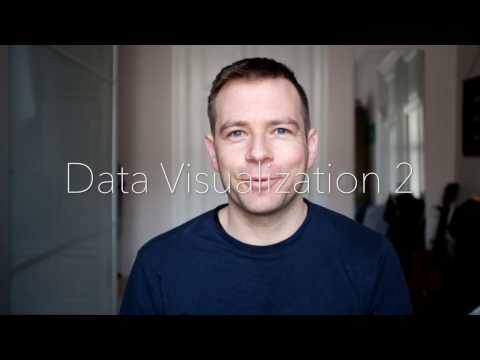

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zE6Nr8trdrw', width=800, height=450)

> *Excercise:* Some questions about the video. 
>
> * Mention 10 examples of ways we can encode data.
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
> * Explain in your own words: What is the problem with pie-charts?

<div class="alert alert-block alert-info">
Try to answer these using your human brain (rather than your LLMs first).
</div>

## Part 2: Visualizing geo-data

It turns out that `plotly` (which we used during Week 2) is not the only way of working with geo-data. There are many different ways to go about it. (The more advanced PhD and PostDoc researchers in my group simply use matplotlib, since that provides more control.)

Today, we'll try another library for geodata called [Folium](https://github.com/python-visualization/folium). It's good for you all to try out a few different libraries - remember that data visualization and analysis in Python is all about the ability to use many different tools. 

The exercise below is based on the code illustrated in this nice [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data), so let us start by taking a look at that one.

*Reading*. Read through the following tutorial
 * "How to: Folium for maps, heatmaps & time data". Get it here: https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data. \[**UPDATE 2025**: This is still a great tutorial, but the Stamen tiles are no longer avialible, so some of the plots won't display. You can still run everything, however. \]
 * <font color=gray>You can also experiment with getting your LLM to generate a nice tutorial for you, if you're so inclined.</font>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calplot as cp
import folium

In [2]:
# load the combined dataset
df = pd.read_csv('../res/SF_combined_police_reportst_2003_to_present.csv')
df['FullDate'] = pd.to_datetime(df['FullDate']) 

> *Exercise*: A different take on geospatial data. 
>
>A couple of weeks ago (Part 3 of Week 2), we worked with spacial data by using color-intensity of shapefiles to show the counts of certain crimes within those individual areas. Today, we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.
> 
> * First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
> * Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled marker.

In [10]:

sf_map = folium.Map([37.7749, -122.4194], zoom_start=13)

# city hall coords
folium.Marker([37.77919, -122.41914],
          popup="SF City Hall",
          icon=folium.Icon(color='pink')
         ).add_to(sf_map)

sf_map

> * Now, let's plot some more data (no need for pop-ups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
> We can call this kind of visualization a *point scatter plot*.

<div class="alert alert-block alert-info">
It's OK to use LLMs for the folium exercises (this one and the next two). But do try to understand the code that you're putting together.
</div>


In [33]:
df_drugnarcotic = df[(df["Category"] == "DRUG/NARCOTIC")]
date_range = pd.Series(pd.date_range("2013-03-01", "2013-03-31"))

df_drugnarcotic_filtered = df_drugnarcotic[(df_drugnarcotic["FullDate"].isin(date_range))]


df_drugnarcotic_filtered.head()

,FullDate,FullTime,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
1279,2013-03-05,09:40,DRUG/NARCOTIC,PARK,-122.436851,37.770343,9,Tuesday,5,March,2013
1972,2013-03-08,20:04,DRUG/NARCOTIC,TARAVAL,-122.478614,37.754145,20,Friday,8,March,2013
7733,2013-03-02,21:08,DRUG/NARCOTIC,MISSION,-122.410493,37.764941,21,Saturday,2,March,2013
7954,2013-03-08,20:04,DRUG/NARCOTIC,TARAVAL,-122.478614,37.754145,20,Friday,8,March,2013
8102,2013-03-29,09:43,DRUG/NARCOTIC,NORTHERN,-122.418382,37.783258,9,Friday,29,March,2013


In [51]:
sf_map = folium.Map([37.7749, -122.4194], zoom_start=13)
# for each reported crime in the dataset, create a folium.CircleMarker using the Latitude and Longitude values from the dataframe
for _, row in df_drugnarcotic_filtered.iterrows():
    folium.Circle(
        location=[row["Latitude"], row["Longitude"]],  # Lat, Long from DataFrame
        radius=100,  # Circle size
        weight=1, # border weight
        color="red",  # Circle border color
        fill_color="red",  # Fill color
        opacity=0.9,  # Transparency level
        tooltip=f"Date: {row['FullDate']}"
    ).add_to(sf_map)

sf_map


Ok. Time for a little break. Note that a nice thing about Folium is that you can zoom in and out of the maps.

> *Exercise*: Heatmaps.
> * Now, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.
>    * To create your first heatmap, grab all arrests for the category `'PROSTITUTION'` across all time. Play with parameters to get plots you like.
>    * Now, comment on the differences between scatter plots and heatmaps. 
>      - What can you see using the scatter-plots that you can't see using the heatmaps? 
>      - And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
>    * Play around with the various parameters for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html
>    * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (for example, try ,`radius=10` and `blur=5` - what happens to the image?).

In [62]:
df_prostitution = df[(df["Category"] == "PROSTITUTION")]
heat_data = df_prostitution[["Latitude", "Longitude"]].values.tolist()


In [72]:
from folium.plugins import HeatMap

sf_map = folium.Map([37.7749, -122.4194], zoom_start=13)
HeatMap(heat_data, radius=10, blur=5).add_to(sf_map)

sf_map

For the final element of working with heatmaps, let's now use the cool Folium functionality `HeatMapWithTime` to create a visualization of how the patterns of your favorite crime-type changes over time.

> *Exercise*: Heatmap movies. This exercise is a bit more independent than above - you get to make all the choices.
> * Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).
> * Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.
> * Create the movie using `HeatMapWithTime`.
> * Comment on your results: 
>   - What patterns does your movie reveal?
>   - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

In [85]:
# drug/narcotic - monthly
df_drugnarcotic = df[(df["Category"] == "PROSTITUTION")]
# Group by Year and Month for at least 20 frames
df_drugnarcotic["YearMonth"] = df_drugnarcotic["FullDate"].dt.to_period("M")  # YYYY-MM format

# Sort data by date
df_drugnarcotic = df_drugnarcotic.sort_values("FullDate")

# Get a list of unique months
unique_months = df_drugnarcotic["YearMonth"].unique()
df_drugnarcotic.head()

/var/folders/jf/0nvl5lz97m9gb6py4xb28b1c0000gn/T/ipykernel_76404/3320659734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugnarcotic["YearMonth"] = df_drugnarcotic["FullDate"].dt.to_period("M")  # YYYY-MM format


,FullDate,FullTime,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,YearMonth
1101600,2003-01-01,23:55,PROSTITUTION,TENDERLOIN,-122.416075,37.78445,23,Wednesday,1,January,2003,2003-01
422092,2003-01-01,23:30,PROSTITUTION,TENDERLOIN,-122.416075,37.78445,23,Wednesday,1,January,2003,2003-01
531829,2003-01-01,23:30,PROSTITUTION,TENDERLOIN,-122.416075,37.78445,23,Wednesday,1,January,2003,2003-01
1058744,2003-01-01,00:01,PROSTITUTION,TENDERLOIN,-122.416075,37.78445,0,Wednesday,1,January,2003,2003-01
235488,2003-01-01,22:35,PROSTITUTION,TENDERLOIN,-122.416075,37.78445,22,Wednesday,1,January,2003,2003-01


In [86]:
from folium.plugins import HeatMapWithTime

# Prepare data for HeatMapWithTime
heatmap_data = []
time_labels = []

for month in unique_months:
    # Filter data for the current month
    month_data = df_drugnarcotic[df_drugnarcotic["YearMonth"] == month]
    
    # Extract Latitude and Longitude as a list of lists
    heatmap_data.append(month_data[["Latitude", "Longitude"]].values.tolist())

    # Append the corresponding time label
    time_labels.append(str(month))

# Create a base map centered on San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add the time-based heatmap
HeatMapWithTime(heatmap_data
                #, index=time_labels, radius=10, auto_play=True, max_opacity=0.6, use_local_extrema=True
                ).add_to(sf_map)

sf_map  # Display in Jupyter Notebook (if applicable)

# Part 3: Putting everything you've learned to work

Now you've learned about lots of time-series analysis tricks and visualization. That means it's time for you to think for yourself with a slightly more independent exercise.

> *Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time.
> * It's quite simple really, I'd like you to present your own analysis of what happens to the `PROSTITUTION`
> crime type in SF over time.
>   - Hint 1: So think about trends over time, does every district show the same behavior?, or the same beahavior over time?, are there hotspots?, etc. A fancy way of saying this is: think about quantifying and explaining spatio-temporal patterns.
>   - Hint 2: It's a good idea to think of this exercise as a way to show off what you've learned about data analysis in this and the previous lectures: so it's a good idea to include many of the types of plots from the curriculum so far in your analysis.
> * As an extra little thing, I also want you to reflect on the *role of data errors* in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

<div class="alert alert-block alert-info">
As almost always, it's OK to use LLMs to help you make your analysis better. But start by thinking about the data with your own human brain, start by coming up with what you want to know and which visualizations could help you understand things better. The thing I hope <b>does not happen</b> is that you use an LLM to come up with the ideas for you - or simply doing the analysis for you (because if that's your choice, you won't learn anything).
</div>